In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

老师给的网址上的数据集不太好用，从其他地方弄了一个数据集来
1. 手动实现了K-fold
2. 通过dataFrame节省计算时间
3. 通过可视化对比不同K对算法的影响
4. 选择确定的K测试算法的准确度

In [2]:
# 从当前目录下的数据集获取数据
data = pd.read_csv('iris.csv', header=0, index_col=0)

In [3]:
# 利用pd的抽样函数打乱数据
data = data.sample(frac=1)

In [4]:
# 获取i位的整数索引
def f_index(f_data, i):
    length = len(f_data)
    return math.floor(length * i)


# 分成F折数据集与测试集两部分,分别是前90%和后10%
data_F = data.iloc[:f_index(data, 0.9)].reset_index(drop=True)
data_T = data.iloc[f_index(data, 0.9):].reset_index(drop=True)

In [5]:
# 通过F折验证确定超参数K：选取周围几个点
def f_fold(f_data):
    for i in range(10):
        yield f_data.iloc[f_index(f_data, i/10): f_index(f_data, (i+1)/10)],\
            pd.concat([f_data.iloc[: f_index(f_data, i/10)], f_data.iloc[f_index(f_data, (i+1)/10):]], ignore_index=True)

In [6]:
# 计算距离的函数，将直接应用到dataframe上的每一行
def distance(x):
    return math.sqrt(x[0]**2 + x[1]**2 + x[2]** 2 + x[3] ** 2)

(0.0, 1.0)

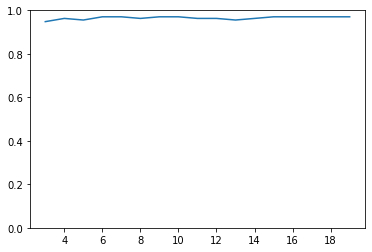

In [7]:
# 确定K值
val_acc = []
for k in range(3,20):
    total = 0
    right = 0
    for data_val, data_tra in f_fold(data_F):
        x_val = data_val.iloc[:,0:4]
        y_val = data_val.iloc[:, [4]]
        x_tra = data_tra.iloc[:,0:4]
        y_tra = data_tra.iloc[:, [4]]
        for i in range(len(x_val)):
            total += 1
            x1 = x_val.iloc[i]
            minus = x_tra - x1
            dis = minus.apply(lambda x : distance(x), axis=1)
            y_spe = y_tra.iloc[dis.sort_values().index[0:k],0]
            y_pre = y_spe.value_counts().idxmax()
            if y_pre == y_val.iloc[i,0]:
                right += 1
    val_acc.append(right / total)
    
fig = plt.figure()
pic = fig.add_subplot(1,1,1)
pic.plot(range(3,20), val_acc)
pic.set_ylim([0,1])

In [8]:
# 选择5作为K值在测试集上运行
total = 0
right = 0

x_test = data_T.iloc[:,0:4]
y_test = data_T.iloc[:, [4]]
x_tra = data_F.iloc[:,0:4]
y_tra = data_F.iloc[:, [4]]

for i in range(len(x_test)):
    total += 1
    x1 = x_test.iloc[i]
    minus = x_tra - x1
    dis = minus.apply(lambda x : distance(x), axis=1)
    y_spe = y_tra.iloc[dis.sort_values().index[0:5],0]
    y_pre = y_spe.value_counts().idxmax()
    if y_pre == y_test.iloc[i,0]:
        right += 1
        
print("采用K=5时的测试准确率为：", right/total)

采用K=5时的测试准确率为： 1.0
